# Data Cleaning: Diabetes Prediction

In [107]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from IPython.display import display
import scipy.stats as stats


pd.set_option('display.max_columns', None)
df = pd.read_csv('./diabetes_012_health_indicators_BRFSS2015.csv')
display(df.head())

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0


## Exploratory Data Analysis (EDA)
1. Understand the dataset Structure (dimensions, data types, missing values, etc).
2. Get descriptive statistics for each column to summarise their central tendencies, spread and potential outliers.
3. Examine the distribution of the target variable (`Diabetes_binary`), as it is important for the prediction task.


In [108]:
df.info()
display(df.describe().transpose())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  float64
 2   HighChol              253680 non-null  float64
 3   CholCheck             253680 non-null  float64
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  float64
 6   Stroke                253680 non-null  float64
 7   HeartDiseaseorAttack  253680 non-null  float64
 8   PhysActivity          253680 non-null  float64
 9   Fruits                253680 non-null  float64
 10  Veggies               253680 non-null  float64
 11  HvyAlcoholConsump     253680 non-null  float64
 12  AnyHealthcare         253680 non-null  float64
 13  NoDocbcCost           253680 non-null  float64
 14  GenHlth               253680 non-null  float64
 15  

,count,mean,std,min,25%,50%,75%,max
Diabetes_012,253680.0,0.296921,0.698160,0.0,0.0,0.0,0.0,2.0
HighBP,253680.0,0.429001,0.494934,0.0,0.0,0.0,1.0,1.0
HighChol,253680.0,0.424121,0.494210,0.0,0.0,0.0,1.0,1.0
CholCheck,253680.0,0.962670,0.189571,0.0,1.0,1.0,1.0,1.0
BMI,253680.0,28.382364,6.608694,12.0,24.0,27.0,31.0,98.0
Smoker,253680.0,0.443169,0.496761,0.0,0.0,0.0,1.0,1.0
Stroke,253680.0,0.040571,0.197294,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,253680.0,0.094186,0.292087,0.0,0.0,0.0,0.0,1.0
PhysActivity,253680.0,0.756544,0.429169,0.0,1.0,1.0,1.0,1.0
Fruits,253680.0,0.634256,0.481639,0.0,0.0,1.0,1.0,1.0


## Data Type Conversion
The dataset contains 22 columns, all set to `float64`. However, some columns are essentially binary categorical or binary in nature and should not be represented as floats.

### Binary/Categorical Columns: 
- Convert these columns to integers since they represent distinct categories (0 or 1).
- HighBP, HighChol, CholCheck, Smoker, Stroke, HeartDiseaseorAttack, PhysActivity, Fruits, Veggies, HvyAlcoholConsump, AnyHealthcare, NoDocbcCost, DiffWalk, Sex

### Ordinal Data Columns
- Numerical columns but they represent ordered categories, conversion to integer is appropriate
- GenHlth (ranging from 1 to 5)
- MentHlth and PhysHlth (number of days out of 30, typically integers)
- Age (coded age group ranges, which can be kept as integers)
- Education (1 to 6, education levels)
- Income (income categories from 1 to 8)

### Continuous Data Columns
- BMI is correctly set as float because it is a continuous measure

In [109]:
binary_columns = [
    'HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 
    'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 
    'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'DiffWalk', 'Sex'
]

ordinal_columns = ['GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']

# Convert binary columns to int
df[binary_columns] = df[binary_columns].astype(int)

# Convert ordinal columns to int (they are categorical but ordered)
df[ordinal_columns] = df[ordinal_columns].astype(int)

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253680 entries, 0 to 253679
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Diabetes_012          253680 non-null  float64
 1   HighBP                253680 non-null  int64  
 2   HighChol              253680 non-null  int64  
 3   CholCheck             253680 non-null  int64  
 4   BMI                   253680 non-null  float64
 5   Smoker                253680 non-null  int64  
 6   Stroke                253680 non-null  int64  
 7   HeartDiseaseorAttack  253680 non-null  int64  
 8   PhysActivity          253680 non-null  int64  
 9   Fruits                253680 non-null  int64  
 10  Veggies               253680 non-null  int64  
 11  HvyAlcoholConsump     253680 non-null  int64  
 12  AnyHealthcare         253680 non-null  int64  
 13  NoDocbcCost           253680 non-null  int64  
 14  GenHlth               253680 non-null  int64  
 15  

## Visual Analysis

### Histograms
**Purpose:** Visualise the distribution of numeric attributes.

**Application:** Insights to skewness of the data.

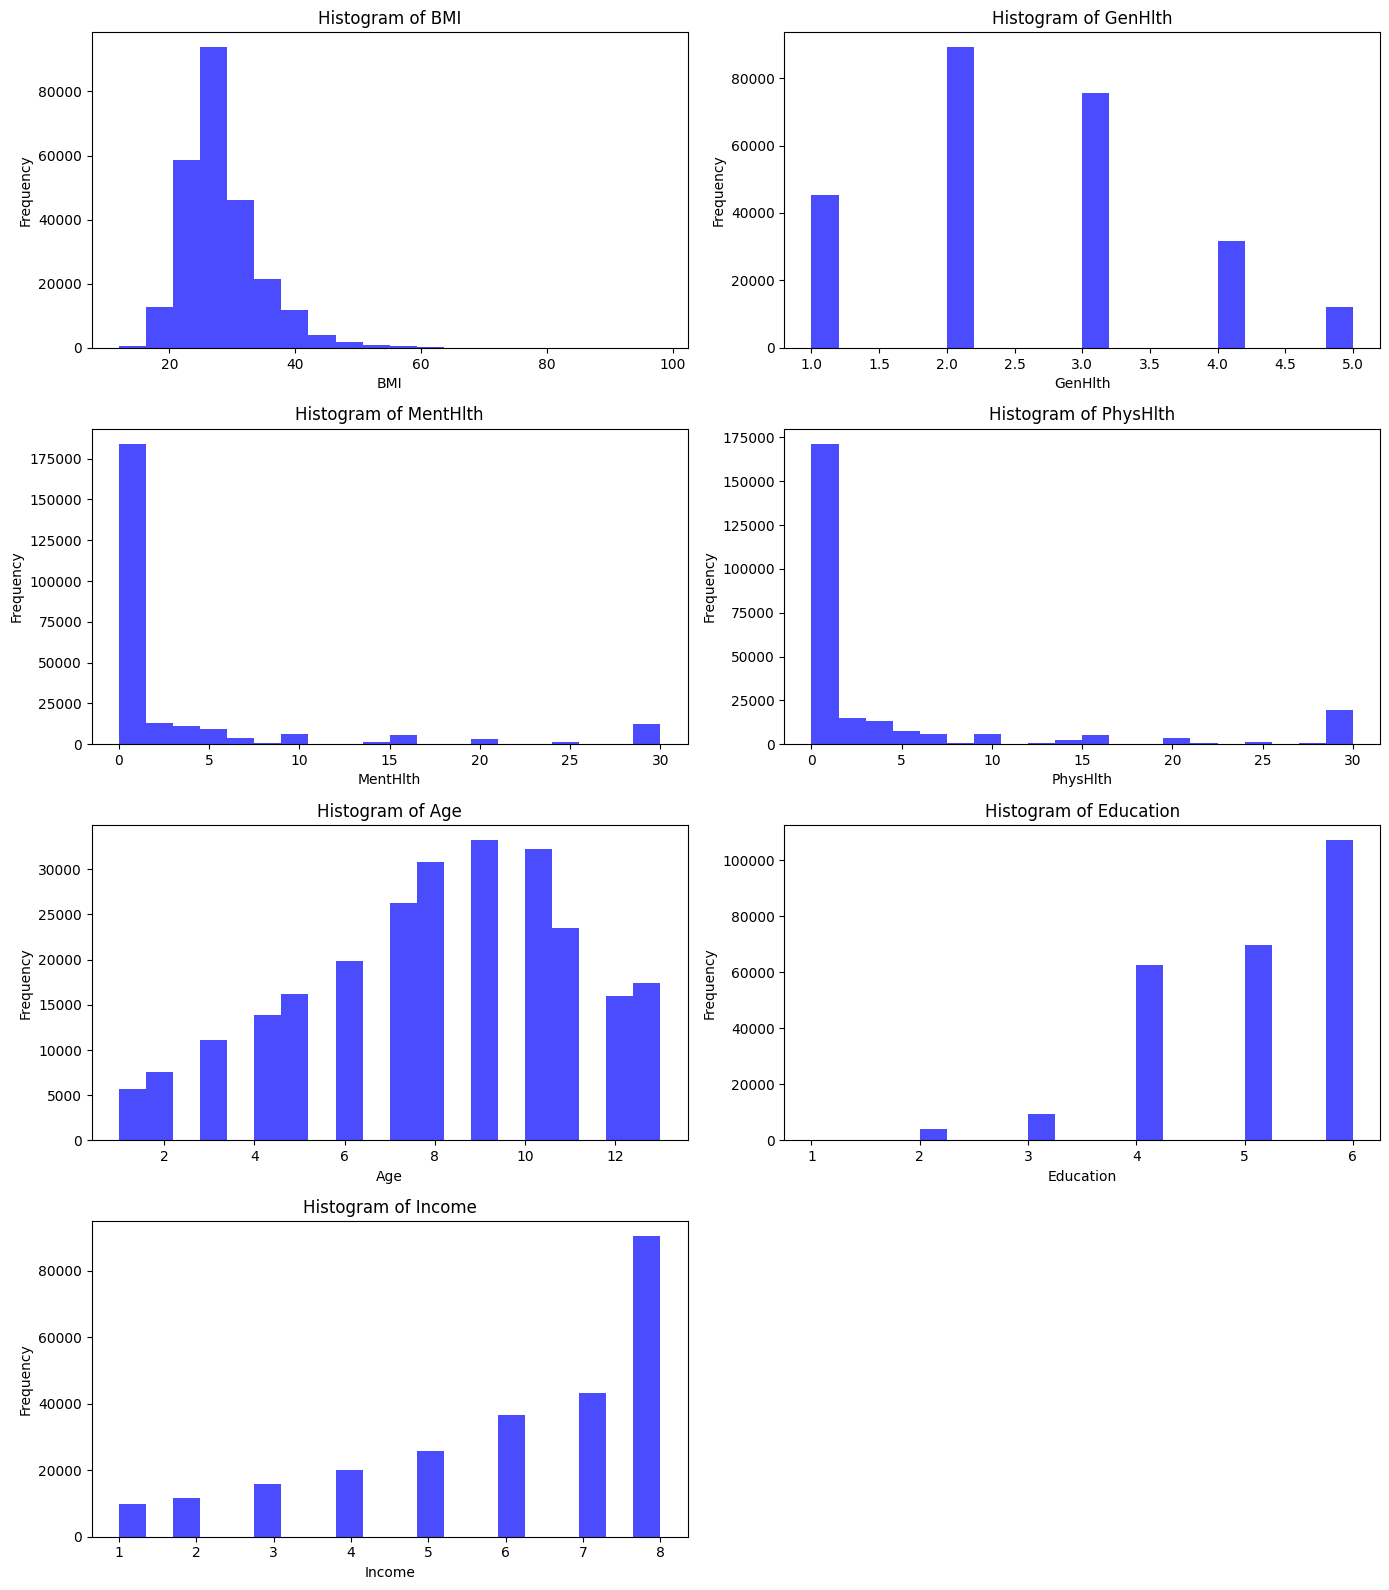

In [90]:
# Set up the plotting area for 7 plots (2 per row)
fig, axes = plt.subplots(4, 2, figsize=(14, 16))
axes = axes.flatten()

# List of attributes to plot
attributes = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']

for i, column in enumerate(attributes):
    axes[i].hist(df[column], bins=20, color='blue', alpha=0.7)
    axes[i].set_title(f'Histogram of {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frequency')

# Remove the last empty subplot
fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

### Box Plots
**Purpose:** Detect outliers and assess the variability in the dataset.

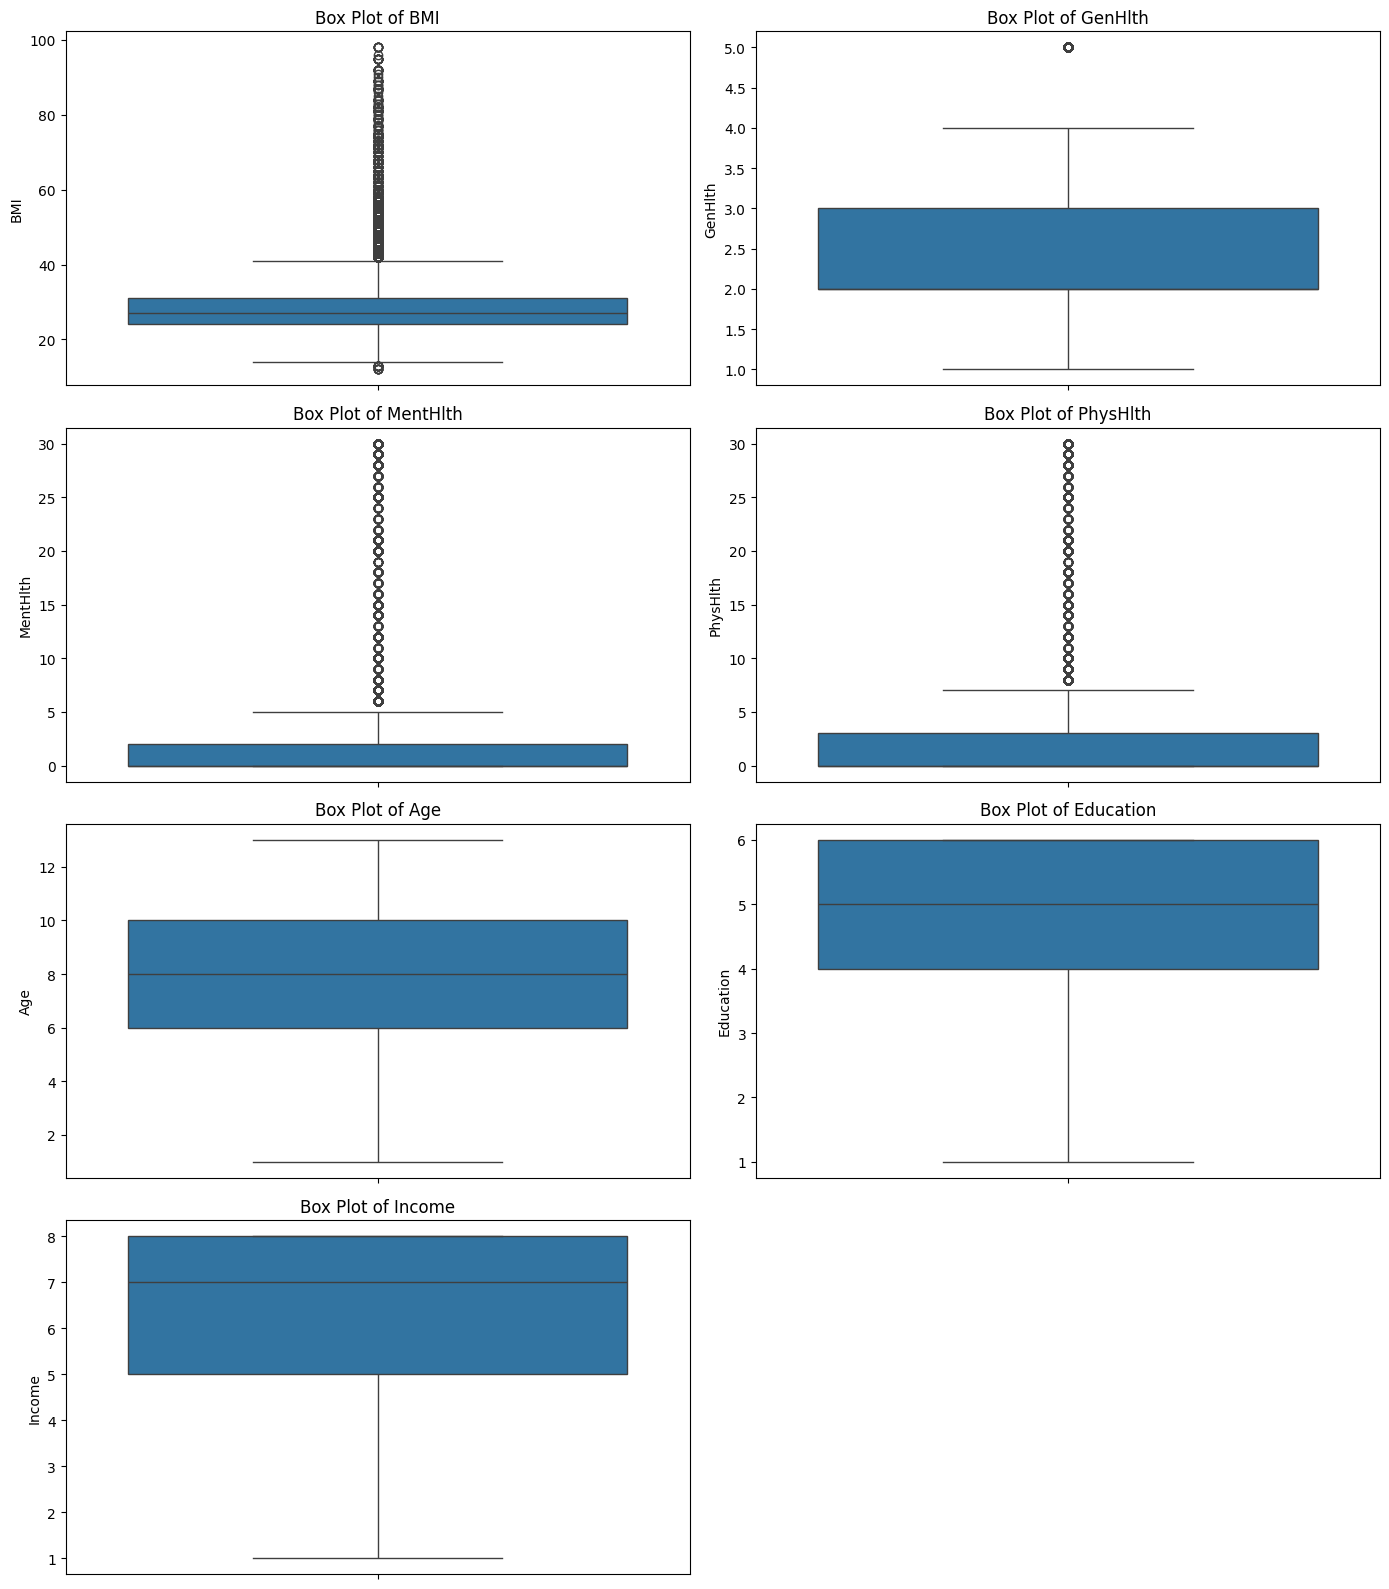

In [91]:
fig, axes = plt.subplots(4, 2, figsize=(14, 16))
axes = axes.flatten()

attributes = ['BMI', 'GenHlth', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']

for i, column in enumerate(attributes):
    sns.boxplot(y=df[column], ax=axes[i])
    axes[i].set_title(f'Box Plot of {column}')
    axes[i].set_ylabel(column)

fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

### Q-Q Plots
**Purpose:** Assess normality of the data distributions.

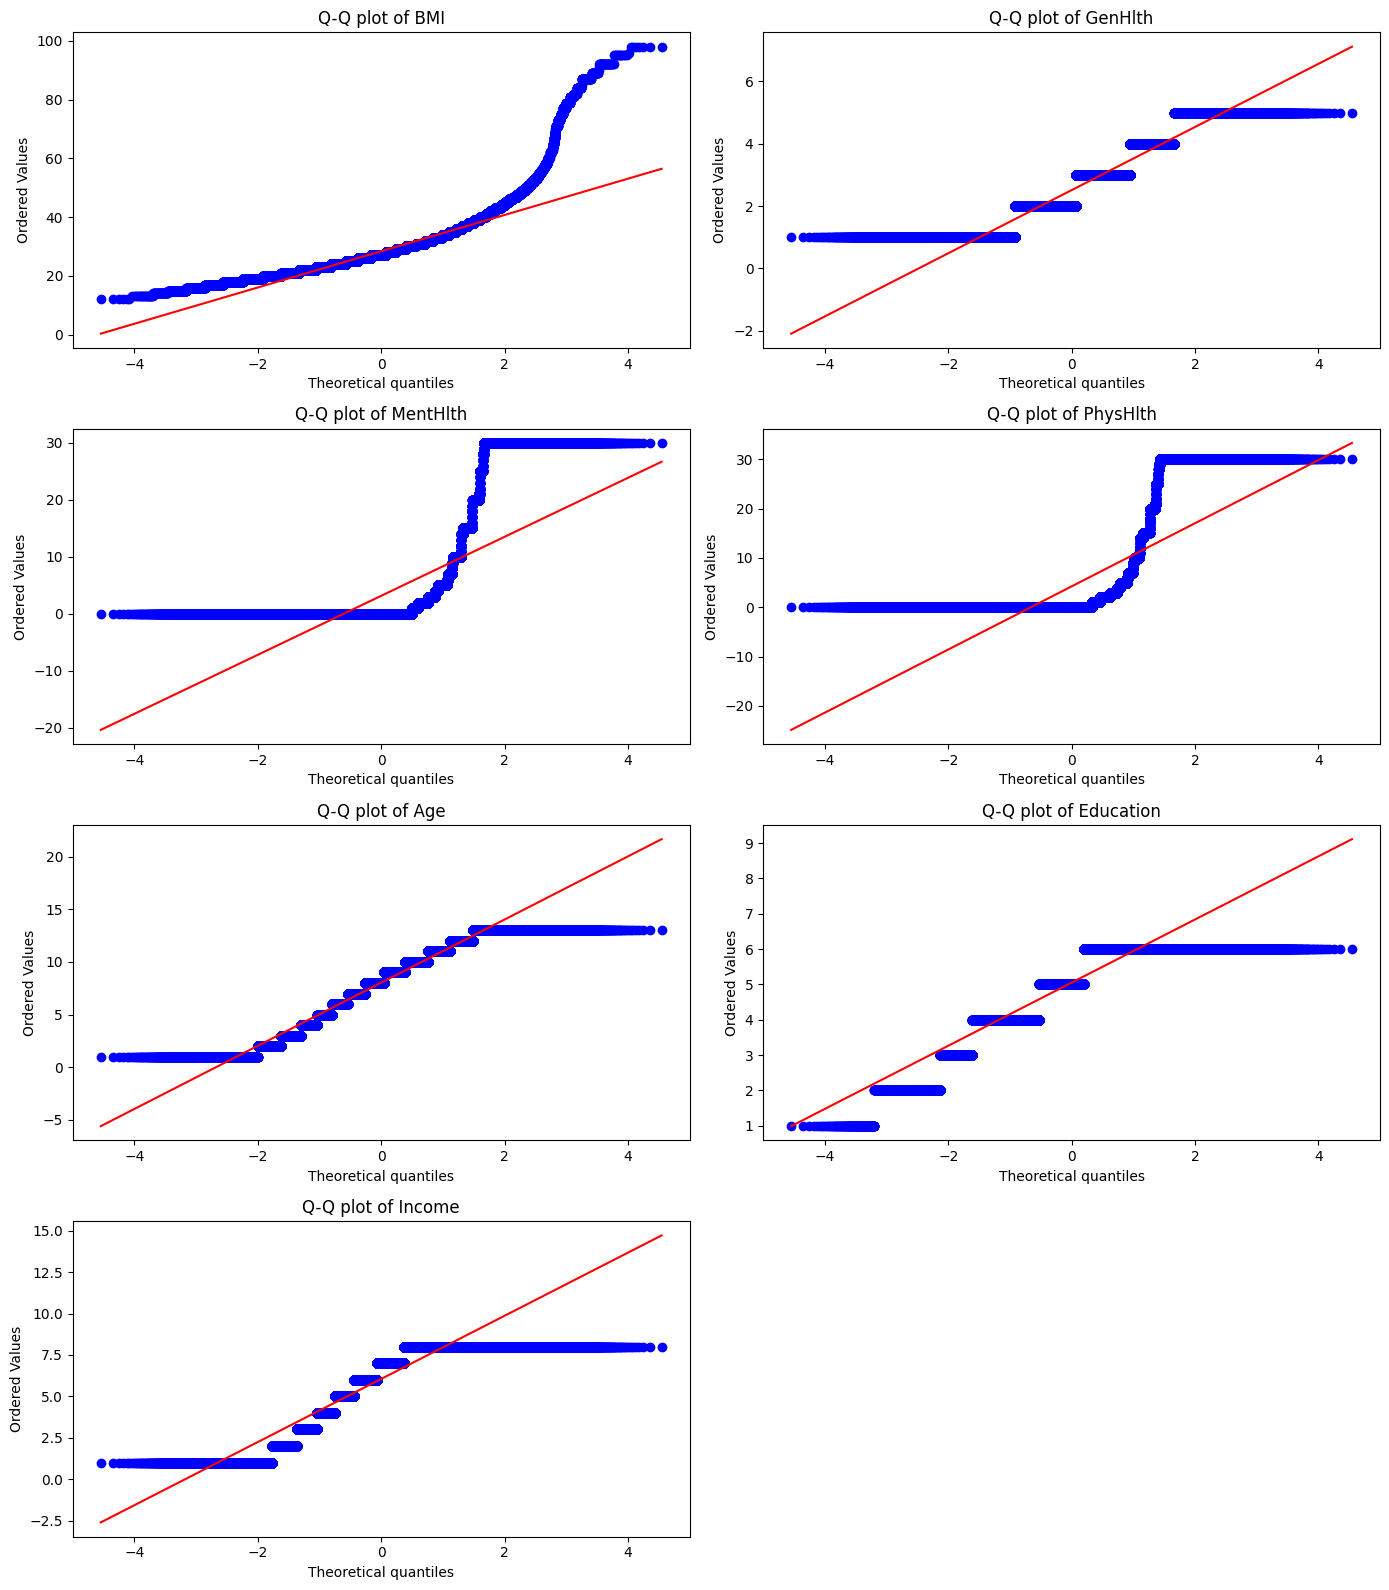

In [92]:
fig, axes = plt.subplots(4, 2, figsize=(14, 16))
axes = axes.flatten()

for i, column in enumerate(attributes):
    stats.probplot(df[column], dist="norm", plot=axes[i])
    axes[i].set_title(f'Q-Q plot of {column}')

if len(attributes) % 2 != 0:
    fig.delaxes(axes[-1])

plt.tight_layout()
plt.show()

### Scatter Plots

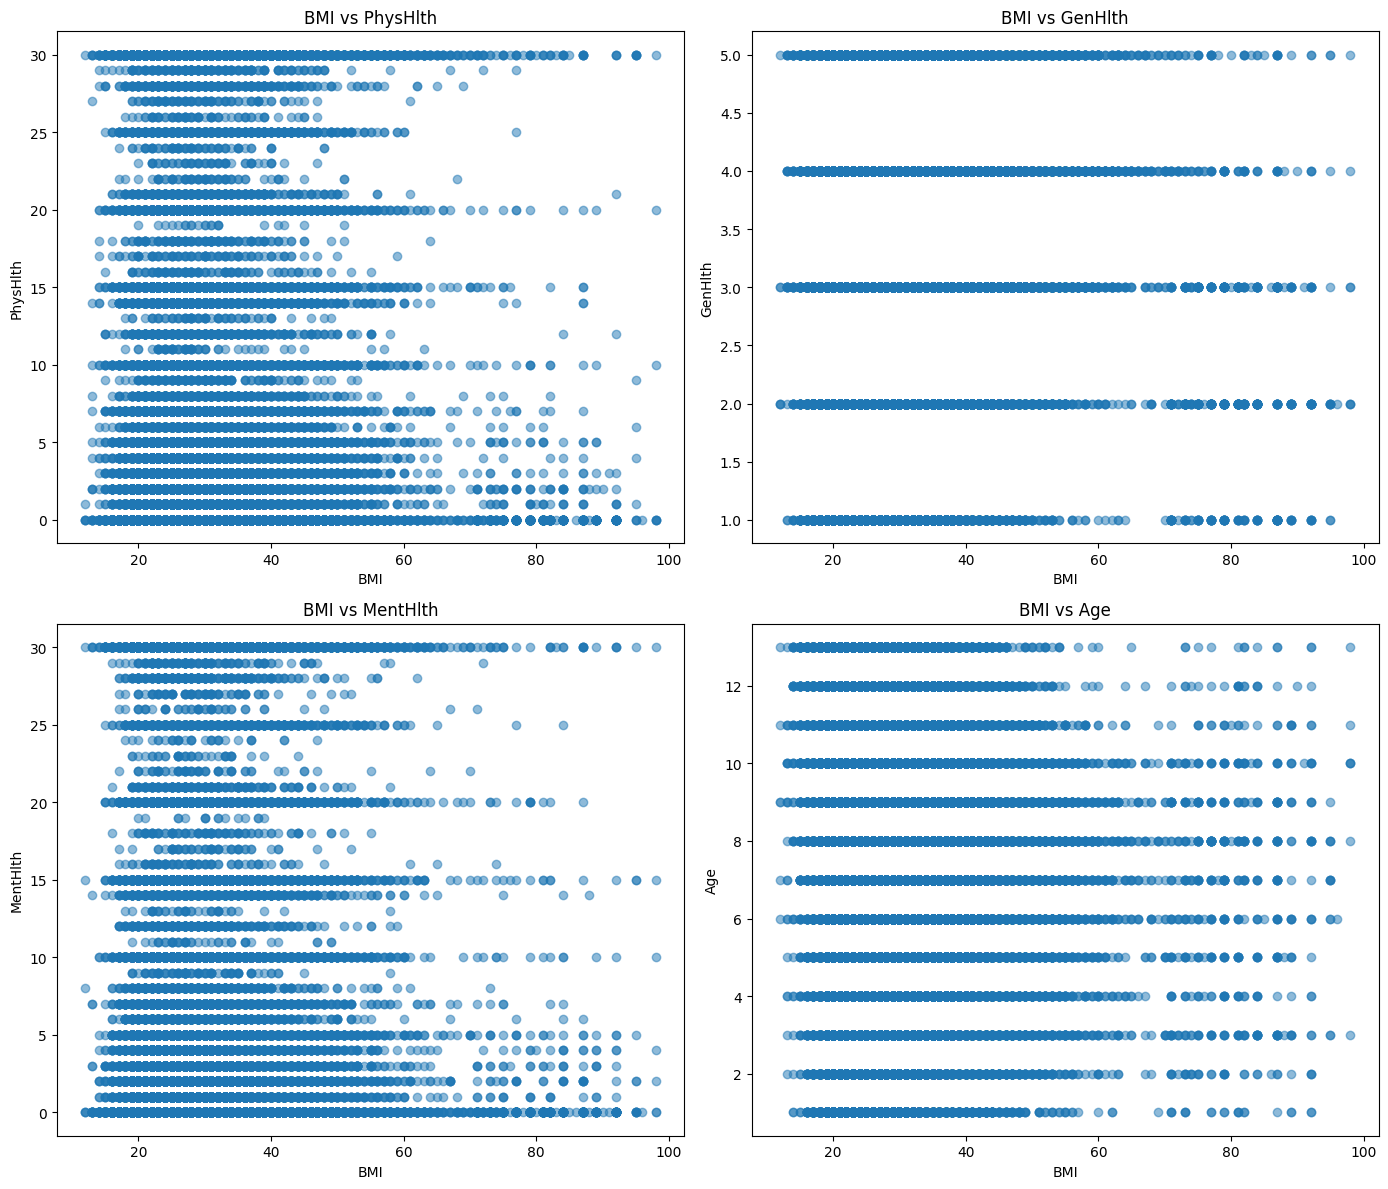

In [93]:
fig, axes = plt.subplots(2, 2, figsize=(14, 12))
axes = axes.flatten()

# Scatter plot of BMI vs PhysHlth
axes[0].scatter(df['BMI'], df['PhysHlth'], alpha=0.5)
axes[0].set_title('BMI vs PhysHlth')
axes[0].set_xlabel('BMI')
axes[0].set_ylabel('PhysHlth')

# Scatter plot of BMI vs GenHlth
axes[1].scatter(df['BMI'], df['GenHlth'], alpha=0.5)
axes[1].set_title('BMI vs GenHlth')
axes[1].set_xlabel('BMI')
axes[1].set_ylabel('GenHlth')

# Scatter plot of BMI vs MentHlth
axes[2].scatter(df['BMI'], df['MentHlth'], alpha=0.5)
axes[2].set_title('BMI vs MentHlth')
axes[2].set_xlabel('BMI')
axes[2].set_ylabel('MentHlth')

# Scatter plot of BMI vs Age
axes[3].scatter(df['BMI'], df['Age'], alpha=0.5)
axes[3].set_title('BMI vs Age')
axes[3].set_xlabel('BMI')
axes[3].set_ylabel('Age')

plt.tight_layout()
plt.show()

### Heatmaps

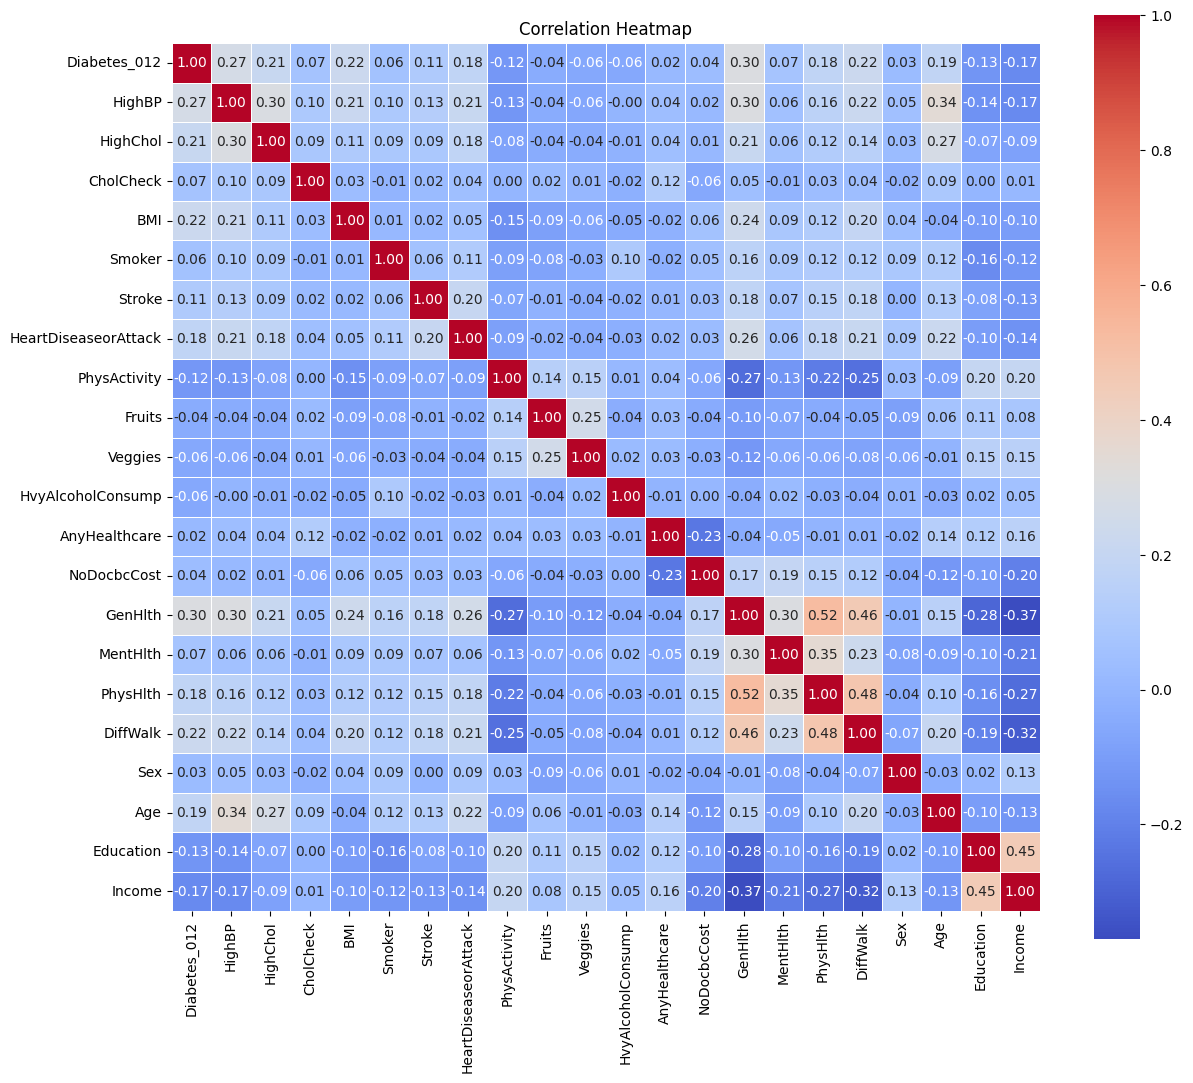

In [94]:
# Compute the correlation matrix
corr = df.corr()
plt.figure(figsize=(14, 12))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', square=True, linewidths=.5)

plt.title('Correlation Heatmap')
plt.show()

## Dataset Exploration and Analysis

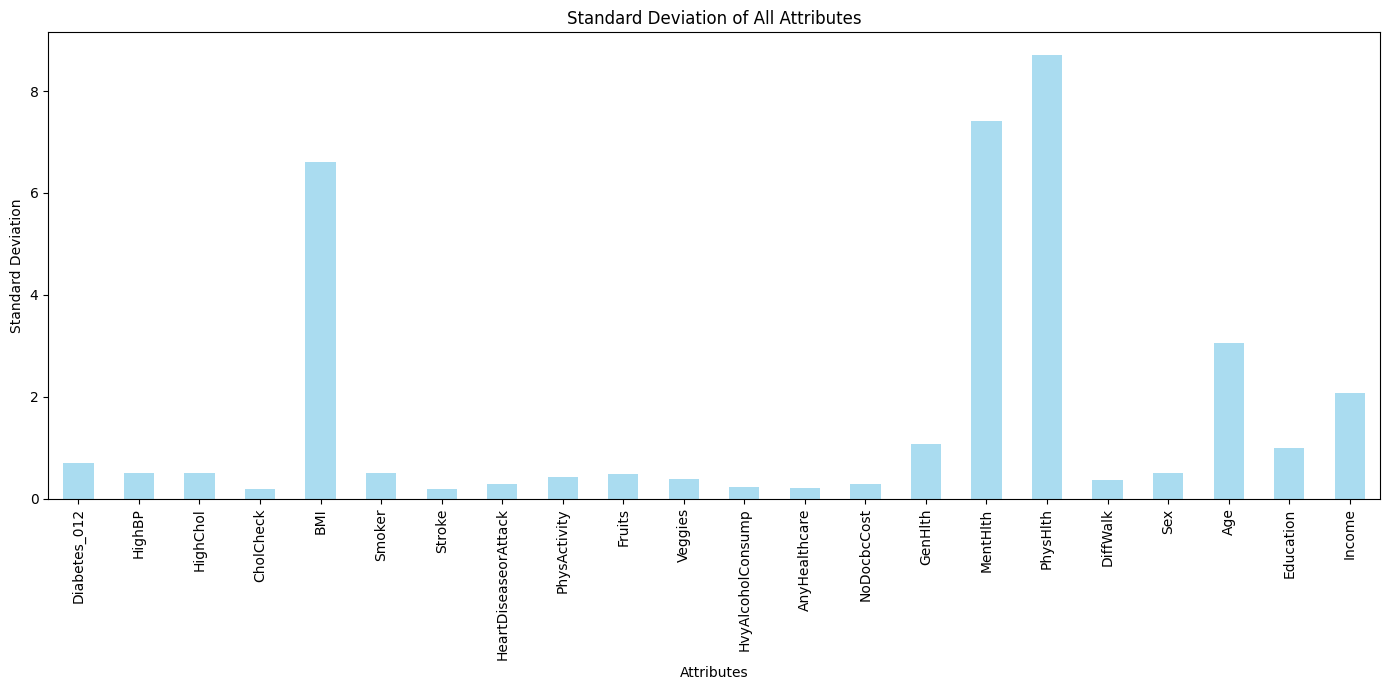

In [95]:
# Standard deviation of all attributes
plt.figure(figsize=(14, 7))
std_devs.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Standard Deviation of All Attributes')
plt.xlabel('Attributes')
plt.ylabel('Standard Deviation')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

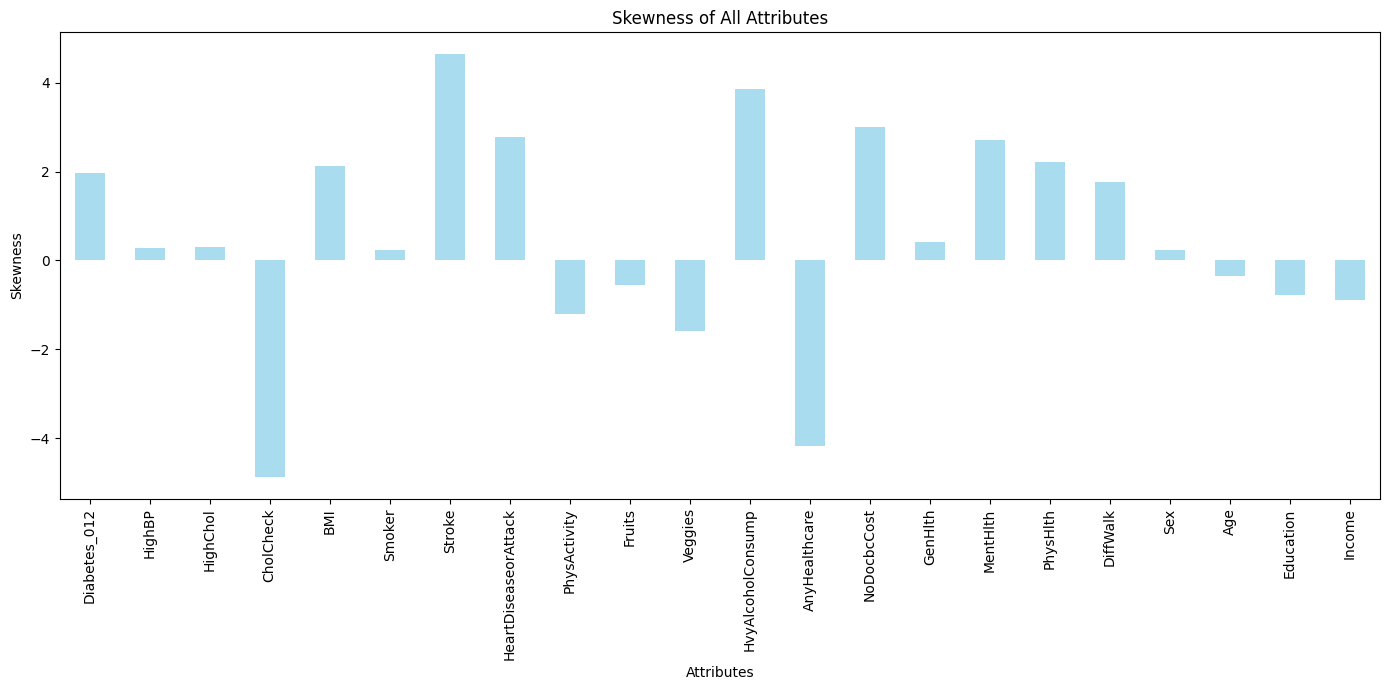

In [96]:
# Calculate skewness for each attribute
skewness = df.skew()
plt.figure(figsize=(14, 7))
skewness.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Skewness of All Attributes')
plt.xlabel('Attributes')
plt.ylabel('Skewness')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

### 

## Handle Missing Data and Outliers
1. Earlier inspection showed no missing values.
2. **Handle Outliers:** Especially in columns like `BMI`, `MentHlth` and `PhysHlth`

In [110]:
# Define the lower and upper bounds for BMI based on IQR
lower_bound_bmi = Q1['BMI'] - 1.5 * IQR['BMI']
upper_bound_bmi = Q3['BMI'] + 1.5 * IQR['BMI']

# Filter out the outliers
df_filtered_bmi = df[(df['BMI'] >= lower_bound_bmi) & (df['BMI'] <= upper_bound_bmi)]

removed_outliers_bmi = df[~df.index.isin(df_filtered_bmi.index)]

print(f"Original shape: {df.shape}")
print(f"Filtered shape: {df_filtered_bmi.shape}")
print(f"Number of removed outliers: {len(removed_outliers_bmi)}")
print("Removed outliers:")
display(removed_outliers_bmi)

# Update the dataframe to the filtered one
df = df_filtered_bmi

Original shape: (253680, 22)
Filtered shape: (243833, 22)
Number of removed outliers: 9847
Removed outliers:


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
85,2.0,1,1,1,45.0,0,0,0,0,0,1,0,1,0,4,2,30,1,0,9,6,8
97,0.0,1,0,1,45.0,0,0,0,1,1,1,0,1,0,3,0,0,0,0,9,4,6
156,2.0,1,1,1,47.0,1,0,0,0,1,0,0,1,0,3,0,0,1,0,11,6,5
188,0.0,1,0,1,43.0,1,0,0,0,0,1,0,1,0,4,0,7,1,0,10,5,2
201,2.0,1,1,1,55.0,0,0,0,0,1,1,0,1,0,4,0,15,0,0,11,5,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253547,0.0,1,1,1,44.0,0,0,0,1,1,1,0,1,1,4,14,30,0,0,3,6,1
253557,0.0,1,1,1,42.0,0,0,0,0,0,0,0,1,0,4,10,20,1,0,6,4,1
253567,0.0,1,1,1,44.0,0,0,1,0,1,1,0,1,1,3,0,0,1,1,11,2,1
253673,0.0,1,0,1,42.0,0,0,0,1,1,1,0,1,0,3,14,4,0,1,3,6,8


In [111]:
lower_bound_menthlth = Q1['MentHlth'] - 1.5 * IQR['MentHlth']
upper_bound_menthlth = Q3['MentHlth'] + 1.5 * IQR['MentHlth']

# Filter out the outliers in MentHlth
df_filtered_menthlth = df[(df['MentHlth'] >= lower_bound_menthlth) & (df['MentHlth'] <= upper_bound_menthlth)]

removed_outliers_menthlth = df[~df.index.isin(df_filtered_menthlth.index)]

print(f"Original shape: {df.shape}")
print(f"Filtered shape: {df_filtered_menthlth.shape}")
print(f"Number of removed outliers in MentHlth: {len(removed_outliers_menthlth)}")
print("Removed outliers in MentHlth:")
display(removed_outliers_menthlth)

df = df_filtered_menthlth

Original shape: (243833, 22)
Filtered shape: (210276, 22)
Number of removed outliers in MentHlth: 33557
Removed outliers in MentHlth:


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1,1,1,40.0,1,0,0,0,0,1,0,1,0,5,18,15,1,0,9,4,3
2,0.0,1,1,1,28.0,0,0,0,0,1,0,0,1,1,5,30,30,1,0,9,4,8
8,2.0,1,1,1,30.0,1,0,1,0,1,1,0,1,0,5,30,30,1,0,9,5,1
14,0.0,0,1,1,33.0,1,1,0,1,0,1,0,1,1,4,30,28,0,0,4,6,2
18,0.0,0,0,0,23.0,0,0,0,0,0,1,0,1,0,2,15,0,0,0,2,6,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253640,0.0,0,0,1,30.0,0,0,0,1,1,1,0,1,0,4,30,0,0,0,5,6,7
253648,0.0,0,0,1,28.0,0,0,0,0,0,1,0,1,1,3,6,14,0,1,5,5,1
253649,0.0,0,1,1,27.0,0,0,0,0,0,0,0,1,0,2,30,5,0,0,4,6,5
253665,0.0,0,1,1,17.0,0,0,0,0,0,0,0,1,1,4,30,30,0,0,5,4,1


In [86]:
lower_bound_phys = Q1['PhysHlth'] - 1.5 * IQR['PhysHlth']
upper_bound_phys = Q3['PhysHlth'] + 1.5 * IQR['PhysHlth']

# Filter out the outliers in PhysHlth
df_filtered_phys = df[(df['PhysHlth'] >= lower_bound_phys) & (df['PhysHlth'] <= upper_bound_phys)]

removed_outliers_phys = df[~df.index.isin(df_filtered_phys.index)]

print(f"Original shape: {df.shape}")
print(f"Filtered shape: {df_filtered_phys.shape}")
print(f"Number of removed outliers in PhysHlth: {len(removed_outliers_phys)}")
print("Removed outliers in PhysHlth:")
display(removed_outliers_phys)

# Update the dataframe to the filtered one
df = df_filtered_phys

Original shape: (10037, 22)
Filtered shape: (8688, 22)
Number of removed outliers in PhysHlth: 1349
Removed outliers in PhysHlth:


,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
283,0.0,1,1,1,20.0,1,0,0,1,1,1,0,1,0,4,0,10,1,0,10,5,3
582,2.0,0,0,1,20.0,1,0,1,0,0,0,0,1,0,5,0,30,1,1,13,3,3
672,0.0,0,0,1,17.0,1,0,0,0,0,1,0,1,0,2,0,30,0,0,13,4,4
714,0.0,1,0,1,20.0,0,0,0,1,1,1,0,1,0,3,3,10,0,0,11,4,5
936,2.0,1,1,1,20.0,0,1,1,0,0,1,0,1,0,5,0,15,1,0,10,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251475,0.0,0,0,1,20.0,0,0,0,1,1,1,0,1,0,5,0,30,0,0,8,6,3
252172,0.0,0,0,1,19.0,0,0,0,0,1,0,0,1,0,2,0,30,1,0,13,6,4
252335,0.0,0,0,1,20.0,0,0,0,0,0,1,0,1,0,2,0,15,0,0,2,5,3
252439,0.0,1,1,1,19.0,0,0,0,0,1,1,0,1,0,4,0,30,1,0,11,4,3


## Remove Duplicates

In [112]:
initial_shape = df.shape
df = df.drop_duplicates()
final_shape = df.shape
print("Initial shape: ", initial_shape)
print("Final shape: ", final_shape)

Initial shape:  (210276, 22)
Final shape:  (186425, 22)


## Clean Dataset

In [113]:
display(df.head())
print(f"Number of rows after cleaning: {df.shape[0]}")

,Diabetes_012,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
1,0.0,0,0,0,25.0,1,0,0,1,0,0,0,0,1,3,0,0,0,0,7,6,1
3,0.0,1,0,1,27.0,0,0,0,1,1,1,0,1,0,2,0,0,0,0,11,3,6
4,0.0,1,1,1,24.0,0,0,0,1,1,1,0,1,0,2,3,0,0,0,11,5,4
5,0.0,1,1,1,25.0,1,0,0,1,1,1,0,1,0,2,0,2,0,1,10,6,8
6,0.0,1,0,1,30.0,1,0,0,0,0,0,0,1,0,3,0,14,0,0,9,6,7


Number of rows after cleaning: 186425
